# Intro

What do you think the role of machine learning? We have data set and want to know the precise probability distribution.

But the size of data is limited so it's impossible to find the exact probability distribution. So we make a machine learning model decided by **parameter**, and we adjust the values of parameter. **The aim of machine learning** is make the probability distribution close to real probability distribution.

## Contents

- aim of machine learning
- model parameter as a probability distribution
- relation between posterior, prior, likelihood
- likelihood and ML
- MLE: maximum likelihood estimation
- MLE solution
- MAP: Maximum A Posterior estimation
- MLE vs MAP

# model parameter as a probability distribution

Let's think a linear function.

$y = f(x) = ax+b \space$ $\space a,b \in \mathbb R$

Any dot in $\R$, function y = ax + b is determined only. In other words, Any dots in $\R^2$ corresponds with other elements in the function space consisted with linear functions.

We call the $\R^2$ space **parameter space**.

![](https://images.velog.io/images/och9854/post/8e54a40a-09a1-4623-824f-54ef97a5e653/image.png)


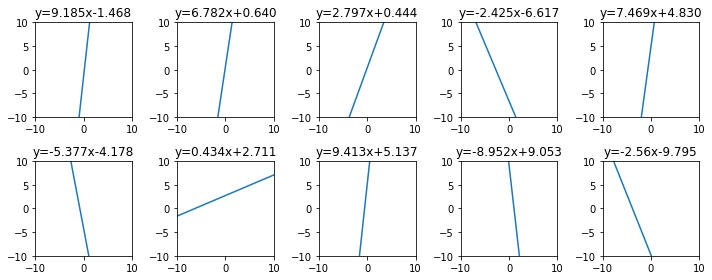

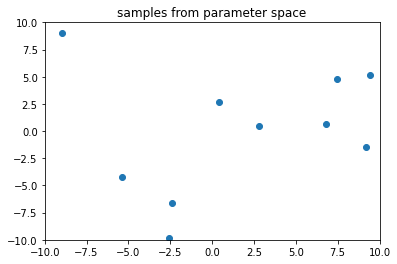

In [1]:
# Drawing y = ax + b (-10 ~ 10)

# to search: gca, tight_layout , flatten why
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

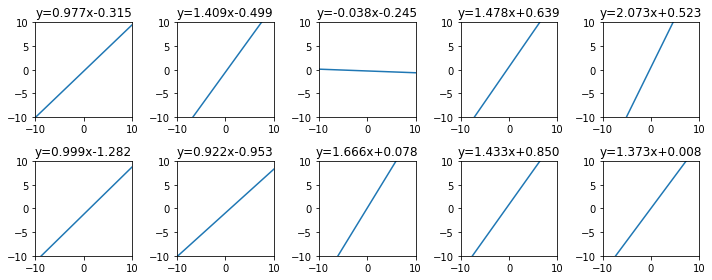

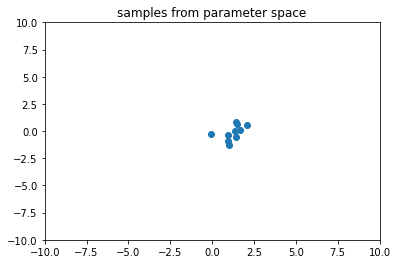

In [2]:
# Drawing y = ax + b (mean=(1,0), standard deviation = 0.5)

parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

# Posterior, Prior, likelihood

> Bayesian machine learning model learns probability distribution through data. **Watching the model parameters as not fix values but probability variables which have uncertainty is the main idea of Bayesian machine learning.**

There's a set of data `X` and the probability distribution `p(x)`. Our aim is to find a linear
model y = $\theta^T x$ which represents p(x) the most.

![](https://images.velog.io/images/och9854/post/34601203-41ea-49fc-b567-bd519a28ae90/image.png)

- Prior probability: In Bayesian statistical inference, is the probability of an event before new data is collected.

- Likelihood: A finite set of possible outcomes, given a probability. Likelihood is about an infinite set of possible probabilities, given an outcome.
  ![](https://images.velog.io/images/och9854/post/1d6a30fb-186a-4d81-b0ea-0822310f2413/image.png)
  - It means that the probability when distribution of parameter is determined.
  - High likelihood = High probability of being the data in our parameter condition.
  - **MLE**: Train model to maximize the `likelihood` of data
  - **MAP**: Train model to maximize the `posterior` of data

## Relation between Posterior, Prior, likelihood

By the multiplication Theorem, we can represent probability distribution X and p(X,$\theta$) which is joint probability of $\theta$.

![](https://images.velog.io/images/och9854/post/92b70a53-09cd-48c4-ac4d-def75db2d05a/image.png)

And we divide p(X) at both side.

![](https://images.velog.io/images/och9854/post/599c3302-de91-4abf-a63f-90f3d833d40a/image.png)

# likelihood & machine learning

![](https://images.velog.io/images/och9854/post/10c0c110-30ee-46ba-9809-4c2789b6a0af/image.png)

We see a noise as label $y_n$ minus prediction $y=\theta^T x$. If X is set of input data and Y is a set of label, **likelihood** would be $p(Y|\theta, X)$.

Now let's think about likelihood of one data $p(y_n|\theta, x_n)$. How do we think the distribution of output?

If we assume a noise distribution as a normal distribution which has mean 0 and standard deviation is $\sigma$, **mean of distribution** would be mean $\theta^T x_n$ and standard deviation $\sigma$.

![](https://images.velog.io/images/och9854/post/15d0f284-0a4a-4010-b58f-e4f9bd03c20f/image.png)

# Likelihood


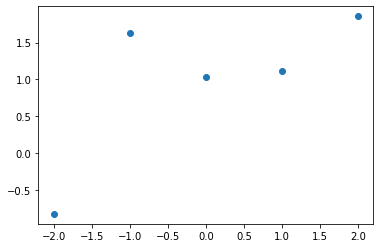

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

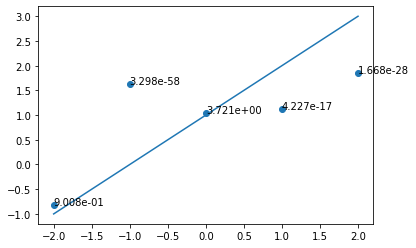

In [8]:
# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

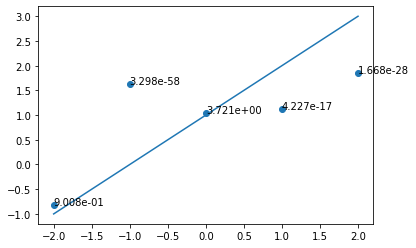

In [9]:
# searched: annotate, pow

# model: y = ax + b
# a, b 값을 바꾸면서 실행해보세요
#-------------------------------#
a = 1
b = 1
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1))) # pow = power

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i])) # 주석 = annotate

plt.show()


## Why is likelihood important?

As you saw in example, The further the data point from model function, the lower likelihood of data exponentially.

So **MLE(Maximum likelihood estimation)** tries to find parameters which maximize the likelihood of data.

# MLE

[MLE](https://youtu.be/XepXtl9YKwc)

## likelihood of all dataset

Good machine learning model maximize likelihood not only each data, but also all the data points in dataset. How can we calculate the likelihood of entire dataset?

First, let's say our data points are `i.i.d(independent and identically distributed)`. As all the data points are independent, the likelihood of all dataset is same with multiplication of all likelihoods of dataset.

![](https://images.velog.io/images/och9854/post/b1395340-80f1-4f30-a319-1f5cb74a5f61/image.png)

And normally we find a parameter which maximizes **log likelihood**. Because differential computation is more comfortable when we use **log**. We just add them instead of multiplying in likelihood. And log function is monotonically increasing, it doesn't affect the result of training.

![](https://images.velog.io/images/och9854/post/9a4358cc-d0e6-462d-8838-373fc97de14b/image.png)

![](https://images.velog.io/images/och9854/post/74954cbd-9497-4ce4-b4cf-72e400c75cfe/image.png)

Sometimes we use negative log likelihood, too.

![](https://images.velog.io/images/och9854/post/233545ba-a33c-4178-b645-6c4b54644d99/image.png)

This function is just the same with least square! It's basically same with finding the parameter which minimize negative log likelihood.

This is the function \*\*L($\theta$) that we should minimize.

![](https://images.velog.io/images/och9854/post/f9c3f3d2-9354-42e4-a1e3-b7b264f58c37/image.png)

The minimum theta is same with the solution of L'($\theta$) = 0. L($\theta$) is quadratic equation about $\theta$, we have only one minimum value.

![](https://images.velog.io/images/och9854/post/9540a16a-6979-4284-b57e-fd9fc745d175/image.png)

## maximum log likelihood

![](https://images.velog.io/images/och9854/post/658f3ab0-6911-4a21-8abd-62312a3f1007/image.png)

![](https://images.velog.io/images/och9854/post/0628a068-3bc0-4138-9f29-f07bb11fcd80/image.png)

![](https://images.velog.io/images/och9854/post/8acef681-5f83-4b28-abdd-57c7d430cc6f/image.png)

So the optimal parameter is like this.

![](https://images.velog.io/images/och9854/post/6ce64a1f-e644-47f6-8cab-2263ae188aec/image.png)

# MLE optimal solution

## Make dataset


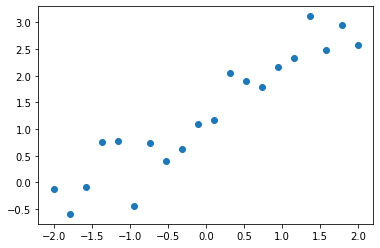

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

### likelihood and parameter

Let's say we assumed the standard deviation as 0.1.

![](https://images.velog.io/images/och9854/post/21be9711-5c6f-42f0-a0ef-32a16da47958/image.png)

And the thing we need to care is that **data is not a scalar, but a column vector which is two dimensional column vector**. So X is 20 x 2 matrix.

![](https://images.velog.io/images/och9854/post/60af7bd4-5ae7-49e8-9641-97276c6e8830/image.png)

In [12]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


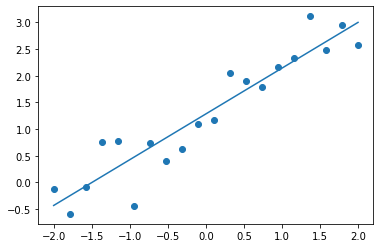

In [13]:
# searched: linalg, inv

# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) #linalg = linear algebra #inv = inverse

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

# - MAP: Maximum A Posterior estimation

## prior distribution

![](https://images.velog.io/images/och9854/post/6ce64a1f-e644-47f6-8cab-2263ae188aec/image.png)

There's one thing that we can see in this equation. **MLE's optimal solution rely on only seen data.** However, if there's outlier a lot in dataset, model's stability will be low.

MAP finds the parameter maximizes the probability in p($\theta$ | X).

- In supervised learning

![](https://images.velog.io/images/och9854/post/f02dbae9-e30d-4af9-9bda-71b894bfd415/image.png)

prior distribution p($\theta$) is a probability distribution when there's no seen data. Let's assume p($\theta$) as mean (0,0), covariance $\sigma$ = $\alpha^2 I$.

![](https://images.velog.io/images/och9854/post/6a12f611-ddd4-47ba-936c-b33843821daf/image.png)

Same as in MLE, we will find the parameter which minimize negative log posterior.

![](https://images.velog.io/images/och9854/post/3ac1e751-2bc0-444c-9459-920fd65364f3/image.png)

![](https://images.velog.io/images/och9854/post/ef2231b3-33a8-4bc3-921f-b0f7f53d4a8d/image.png)

- P($\theta$)

![](https://images.velog.io/images/och9854/post/8cbbaeca-b712-4e3e-b938-14dbe8bf03e1/image.png)

![](https://images.velog.io/images/och9854/post/513ba6cb-8208-43aa-8617-2dd5970cb013/image.png)

![](https://images.velog.io/images/och9854/post/610ac7a4-f056-4180-a926-013d6ee21fb8/image.png)

![](https://images.velog.io/images/och9854/post/251d780d-6b5d-4d03-9be5-344682f2a24e/image.png)

One different thing with MLE's solution is that MAP's solution has $(\sigma^2/alpha^2)I$! **What does this term mean?**

## MAP as L2 Relation

![](https://images.velog.io/images/och9854/post/298913b7-ba9e-4d98-b7d4-31587af91cea/image.png)

We saw the first term when we looked MLE. Now let's see the last term.

![](https://images.velog.io/images/och9854/post/7f76d046-b380-43f1-80a7-170dae3128f7/image.png)

$\theta^T \theta$ is same with \*\*square of L2 norm, $||\theta||^2$. Lets' say $\lambda$ as $1/2\alpha^2$.

![](https://images.velog.io/images/och9854/post/8ff1e48a-22a0-4c93-88ed-bc0338b97f34/image.png)

# MLE vs MAP

## Making dataset

MAP is similar with MLE but has **negative log prior** term. That's why MAP model is more stable than MLE model. Let's compare them using with dataset which has outlier.


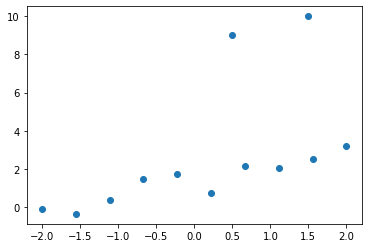

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5]) # append [0.5, 1.5] in input_data list
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

## Calculate parameter 

![](https://images.velog.io/images/och9854/post/347c814a-1262-46ed-a5d6-a30fe7a6c72f/image.png)

These are the optimial parameter of each functions. 

- Assume: $\sigma = 0.1$, standard deviation of parameter distribution $\alpha = 0.04$

The smaller $\alpha$ is, the the stronger constrains about the parameter.



In [15]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


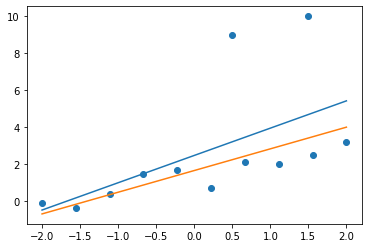

In [16]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

You can compare the negative log likelihood of MLE, MAP. MAP's value is bigger than that of MLE(=MAP's likelihood is smaller), but the change when outlier appended is smaller than MLE!